In this part of the homework, you will download 3 time series that were produced by TESS. The format of the data is given in two columns: Time (BJD = Barycentric Julian Date, or days) and differential magnitude (mmag). Each file containing the time series is formatted as 'IDnumber.rw', and there are no headers or column headings (in other words, they are barebones ASCII files).

The three files are available at the following links:

https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

https://drive.google.com/open?id=1q10RiwR20PpBDsWM6MAJY_L9sfrod_N0

https://drive.google.com/open?id=1wQ2zloxuoZ4xfyLLyNSltveOLek4C8-8

Start by loading the data and plotting each of these time series (with proper axes and with the ID number shown for each star).

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
from scipy.stats import binned_statistic

# **Data ingestion**

In [22]:
time_series_1 = pd.read_csv("011400909.rw",names=['BJD', 'mmag'], delimiter=' ')
time_series_2 = pd.read_csv("146879345.rw",names=['BJD', 'mmag'], delimiter=' ')
time_series_3 = pd.read_csv("277023834.rw",names=['BJD', 'mmag'], delimiter=' ')

In [23]:
time_series_2.head()

,BJD,mmag
0,1468.276144,0.030515
1,1468.277532,0.032342
2,1468.278921,0.033998
3,1468.280310,0.034609
4,1468.281699,0.036624


# **Plotting each time series**

Text(0, 0.5, 'Magnitude (mmag)')

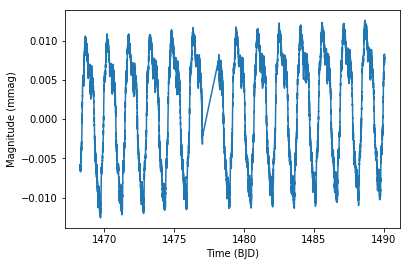

In [25]:
plt.plot(time_series_1.BJD, time_series_1.mmag)
plt.xlabel('Time (BJD)')
plt.ylabel('Magnitude (mmag)')

### Figure 1. Time series: 011400909.

Text(0, 0.5, 'Magnitude (mmag)')

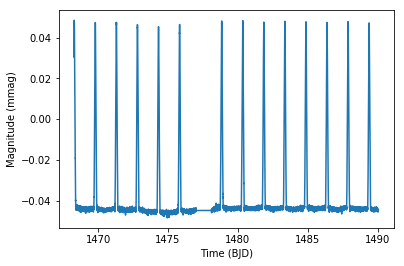

In [26]:
plt.plot(time_series_2.BJD, time_series_2.mmag)
plt.xlabel('Time (BJD)')
plt.ylabel('Magnitude (mmag)')

### Figure 2. Time series: 146879345.

Text(0, 0.5, 'Magnitude (mmag)')

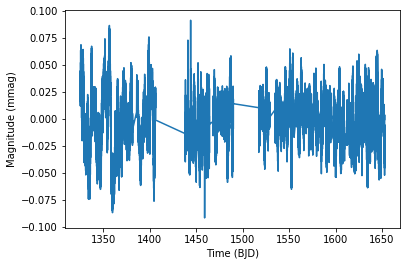

In [27]:
plt.plot(time_series_3.BJD, time_series_3.mmag)
plt.xlabel('Time (BJD)')
plt.ylabel('Magnitude (mmag)')

### Figure 3. Time series: 277023834.

Now that you have plotted each time series, you can probably make an educated guess as to what type of variability (periodic, cyclical or stochastic) is present in each of them. Add a text cell below to put your best "guess" (prediction required for full marks, even if it is wrong or disagrees with answer later in the assignment).

#### Time series 011400909 => Periodic
#### Time series 146879345 => Multiperiodic
#### Time series 277023834 => Stochastic

# **Computing Lomb-Scargle periodograms for each time series**

Using the package loaded above (LombScargle), compute the periodogram (either the power spectrum or the amplitude spectrum, as discussed in class) for each time series, and then plot each periodogram, making sure to properly label the axes and to identify each star. Make sure to choose the frequency range wisely.

For more documentation on the LombScargle package: https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle

For the normalization, make sure to use "psd" so that we can recover units.

### Periodogram for time series: 011400909

Text(0, 0.5, 'Amplitude (mmag)')

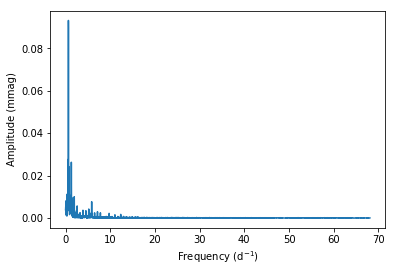

In [42]:
t1 = time_series_1.BJD
y1 = time_series_1.mmag
frequency_1, power_1 = LombScargle(t1, y1, dy = 0.1).autopower(normalization='psd', nyquist_factor=0.2)
amplitude_1 = 2 * (power_1 / len(t1)) ** 0.5
plt.plot(frequency_1, amplitude_1)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')

(0, 10)

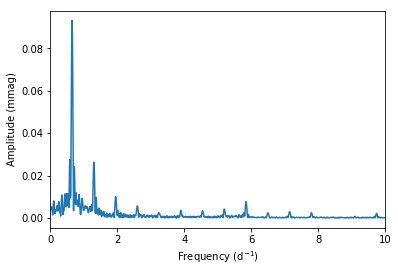

In [37]:
plt.plot(frequency_1, amplitude_1)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')
plt.xlim([0, 10])

### Figure 4: Time series 011400909 is Periodic

In [46]:
1 / frequency_1[amplitude_1 > 0.05]

array([1.58918695, 1.56632095, 1.54410363, 1.52250777, 1.50150767,
       1.48107899])

### Periodogram for time series: 146879345

Text(0, 0.5, 'Amplitude (mmag)')

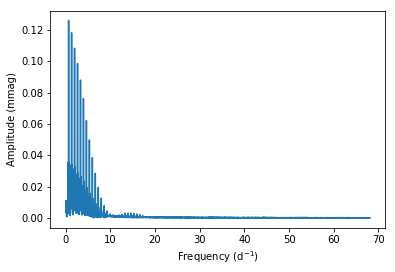

In [31]:
t2 = time_series_2.BJD
y2 = time_series_2.mmag
frequency_2, power_2 = LombScargle(t2, y2, dy = 0.1).autopower(normalization='psd', nyquist_factor=0.2)
amplitude_2 = 2 * (power_2 / len(t2)) ** 0.5
plt.plot(frequency_2, amplitude_2)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')

(0, 10)

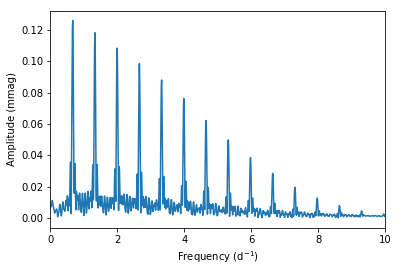

In [38]:
plt.plot(frequency_2, amplitude_2)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')
plt.xlim([0, 10])

### Figure 5: Time series 146879345 is Multi Periodic

In [47]:
1 / frequency_2[amplitude_2 > 0.03]

array([1.68779645, 1.66202856, 1.56637224, 1.5441542 , 1.52255763,
       1.50155684, 1.48112749, 1.46124659, 1.44189233, 1.38678816,
       1.36934429, 0.79172997, 0.76934891, 0.76394997, 0.75862628,
       0.75337627, 0.74819842, 0.74309127, 0.73805336, 0.7185668 ,
       0.51963184, 0.50989635, 0.50751921, 0.50516413, 0.50283081,
       0.50051895, 0.49822824, 0.49595841, 0.4870822 , 0.48491256,
       0.37997512, 0.37865346, 0.37734097, 0.37603755, 0.3747431 ,
       0.37345753, 0.37218075, 0.30366212, 0.30281744, 0.30197745,
       0.3011421 , 0.30031137, 0.2994852 , 0.29866357, 0.25287543,
       0.25228939, 0.25170606, 0.25112542, 0.25054746, 0.24997215,
       0.24939947, 0.21621226, 0.21578369, 0.21535682, 0.21493163,
       0.21450812, 0.21408627, 0.18883412, 0.18850714, 0.18818128,
       0.18785655, 0.18753294, 0.16761027, 0.16735261, 0.16709573])

### Periodogram for time series: 277023834

Text(0, 0.5, 'Amplitude (mmag)')

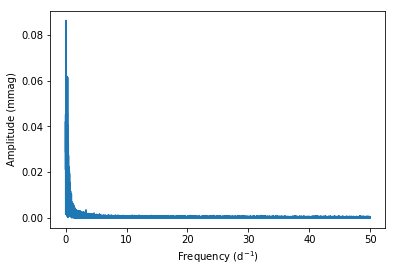

In [36]:
t3 = time_series_3.BJD
y3 = time_series_3.mmag
frequency_3, power_3 = LombScargle(t3, y3, dy = 0.1).autopower(normalization='psd', nyquist_factor=0.2)
amplitude_3 = 2 * (power_3 / len(t3)) ** 0.5
plt.plot(frequency_3, amplitude_3)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')

(0, 10)

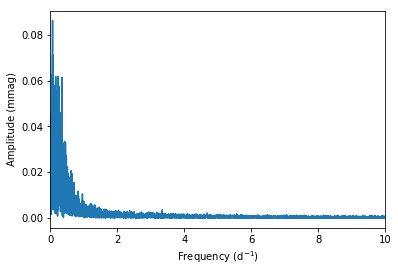

In [39]:
plt.plot(frequency_3, amplitude_3)
plt.xlabel('Frequency (d$^{-1}$)')
plt.ylabel('Amplitude (mmag)')
plt.xlim([0, 10])

### Figure 6: Time series 277023834 is Stochastic

Based on the periodograms you have plotted, add a text box below and indicate what type of variability is exhibited by each of the stars. If one of the stars exhibits *periodic* variations, please also indicate the value of that period.

# **Phase folding**

For any star above exhibiting periodic variations, you will phase-fold their time series. This is accomplished by rescaling the exogenous variable, dividing it by the period (keep in mind that period = 1/frequency, and that if you have multiple periods, or harmonics, you should divide by the fundamental period). However, only the fractional part (e.g. np.modf(x)[0]) of the period must be considered (which means that the axis containing the exogenous variable will no longer be monotonically increasing; therefore, make sure to reorder the dataset appropriately).

Then, plot the phase-folded light curve(s) and identify them accordingly.

Text(0, 0.5, 'Magnitude (mmag)')

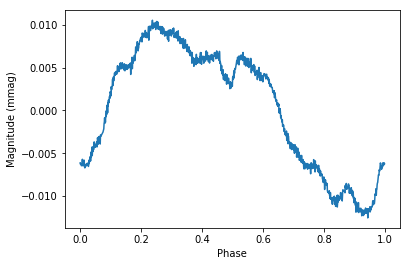

In [54]:
t = time_series_1.BJD
t_0 = time_series_1.BJD[0]
period = 1.54
Phase = (t - t_0) / period
Phase_single = Phase[Phase <=1]
magnutide_single = time_series_1.mmag[Phase <=1]
plt.plot(Phase_single, magnutide_single)
plt.xlabel('Phase')
plt.ylabel('Magnitude (mmag)')

### Figure 7: The phase-folded light curve of time series 011400909

# **Binning**

Finally, you will bin the data so that the phased light curve(s) contains 20 bins (from 0 to 1). To do so, you can use the df.resample() method (or any other method you wish), averaging all the points within each bin. Overplot the binned light curve(s) over the original data using a larger symbol size (and perhaps a different color), and connect the binned points with a line. Are 20 bins appropriate? If not, add more bins and explain why.

Text(0, 0.5, 'Magnitude (mmag)')

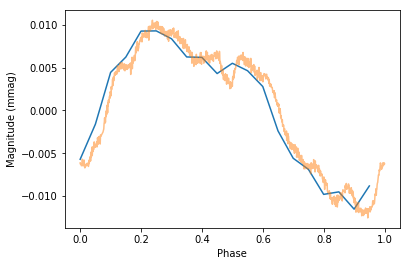

In [57]:
bin_means, bin_edges, binnumber = binned_statistic(Phase_single, magnutide_single, statistic='mean', bins=20)

Phase_binned = bin_edges[0:len(bin_edges) - 1]
plt.plot(Phase_binned, bin_means, linewidth=1.5)
plt.plot(Phase_single, magnutide_single, alpha=0.5)
plt.xlabel('Phase')
plt.ylabel('Magnitude (mmag)')

### Figure 8: Light curve with 20 bins along with the original light curve

Text(0, 0.5, 'Magnitude (mmag)')

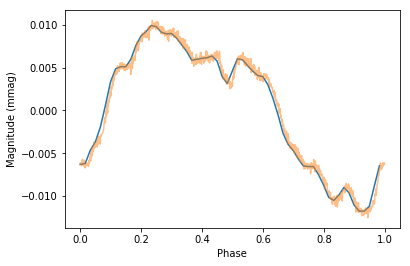

In [58]:
bin_means, bin_edges, binnumber = binned_statistic(Phase_single, magnutide_single, statistic='mean', bins=60)

Phase_binned = bin_edges[0:len(bin_edges) - 1]
plt.plot(Phase_binned, bin_means, linewidth=1.5)
plt.plot(Phase_single, magnutide_single, alpha=0.5)
plt.xlabel('Phase')
plt.ylabel('Magnitude (mmag)')

### Figure 8: Light curve with 60 bins along with the original light curve

#### Adding more bins makes the binned curve match the original light curve.

This concludes the homework assignment!

**Bonus question**: The resulting phase-folded light curve(s) might not be perfectly overlapping, with certain artefacts. Adding a text cell below, comment on what method could help address that issue, and summarily describe how you would go about applying it.